In [71]:
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import natural_earth, Reader
%matplotlib inline
plt.rcParams["figure.dpi"] = 360
# displaying all columns and rows
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
df = pd.read_csv('2024-10-01-2024-11-24-Southeast_Asia.csv')
print(df)

    event_id_cnty       event_date  year  time_precision  \
0        IDN18593  18 October 2024  2024               1   
1        IDN18599  18 October 2024  2024               1   
2        IDN18604  18 October 2024  2024               1   
3        IDN18618  18 October 2024  2024               1   
4        IDN18628  18 October 2024  2024               1   
5        IDN18647  18 October 2024  2024               1   
6        MMR67417  18 October 2024  2024               1   
7        MMR67500  18 October 2024  2024               1   
8        MMR67506  18 October 2024  2024               1   
9        MMR67554  18 October 2024  2024               1   
10        MYS1238  18 October 2024  2024               2   
11       PHL17258  18 October 2024  2024               1   
12       THA13069  18 October 2024  2024               1   
13       THA13070  18 October 2024  2024               1   
14       THA13071  18 October 2024  2024               1   
15       THA13073  18 October 2024  2024

In [7]:
# look at first 5 rows of data
df.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,civilian_targeting,iso,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,IDN18593,18 October 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Indonesia),BEM SI: Indonesian Students Executive Board; S...,Protesters,NaN,NaN,NaN,Protesters only,NaN,360,Southeast Asia,Indonesia,Jakarta,Central Jakarta,Gambir,Jakarta - Central,-6.1806,106.8283,1,Detik,National,"On 18 October 2024, members of the Indonesian ...",0,crowd size=no report,1729632658
1,IDN18599,18 October 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Indonesia),Greenpeace,Protesters,NaN,NaN,NaN,Protesters only,NaN,360,Southeast Asia,Indonesia,Jakarta,Central Jakarta,Gambir,Jakarta - Central,-6.1806,106.8283,1,Antara News,National,"On 18 October 2024, members of Greenpeace prot...",0,crowd size=no report,1729632658
2,IDN18604,18 October 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Indonesia),HMI: Muslim Students Association; Muslim Group...,Protesters,NaN,NaN,NaN,Protesters only,NaN,360,Southeast Asia,Indonesia,West Sulawesi,Majene,Banggae,Banggae,-3.5257,118.9547,2,Tribunnews,National,"On 18 October 2024, members of the Muslim Stud...",0,crowd size=no report,1729632658
3,IDN18618,18 October 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Indonesia),Catholic Christian Group (Indonesia); PMKRI: U...,Protesters,NaN,NaN,NaN,Protesters only,NaN,360,Southeast Asia,Indonesia,East Nusa Tenggara,Sikka,East Alok,East Alok,-8.6300,122.2258,1,Tribunnews,National,"On 18 October 2024, Union of Catholic Universi...",0,crowd size=no report,1729632658
4,IDN18628,18 October 2024,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Indonesia),Teachers (Indonesia),Protesters,NaN,NaN,NaN,Protesters only,NaN,360,Southeast Asia,Indonesia,Jakarta,South Jakarta,Mampang Prapatan,Jakarta - South,-6.2660,106.8135,1,JPNN,National,"On 18 October 2024, more than 500 lecturers an...",0,crowd size=more than 500,1729632658


In [9]:
# see how many rows and columns are in this dataset
shape_info = df.shape 
print('This dataset contains {} rows  and {} columns' 
      .format(shape_info[0], 
              shape_info[1]))

This dataset contains 694 rows  and 31 columns


In [11]:
# see list of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       694 non-null    object 
 1   event_date          694 non-null    object 
 2   year                694 non-null    int64  
 3   time_precision      694 non-null    int64  
 4   disorder_type       694 non-null    object 
 5   event_type          694 non-null    object 
 6   sub_event_type      694 non-null    object 
 7   actor1              694 non-null    object 
 8   assoc_actor_1       229 non-null    object 
 9   inter1              694 non-null    object 
 10  actor2              404 non-null    object 
 11  assoc_actor_2       98 non-null     object 
 12  inter2              404 non-null    object 
 13  interaction         694 non-null    object 
 14  civilian_targeting  156 non-null    object 
 15  iso                 694 non-null    int64  
 16  region  

In [13]:
#selecting columns that are pertient to the project
df_filter = df[['country', 'actor1', 'assoc_actor_1','event_type','sub_event_type', 'region', 'source','fatalities', 'latitude', 'longitude', 'notes']]

In [15]:
conflict_count = df_filter.groupby(['event_type','sub_event_type'])['sub_event_type'].count().to_frame()

In [17]:
conflict_count

sub_event_type
event_type                 sub_event_type                                     
Battles                    Armed clash                                     138
                           Government regains territory                      1
                           Non-state actor overtakes territory               8
Explosions/Remote violence Air/drone strike                                131
                           Grenade                                           6
                           Remote explosive/landmine/IED                    24
                           Shelling/artillery/missile attack                31
Protests                   Peaceful protest                                195
                           Protest with intervention                         2
Riots                      Mob violence                                      8
                           Violent demonstration                             6
Strategic developments     Arrests                                          32
                           Change to group/activity                         13
                           Disrupted weapons use                             5
                           Looting/property destruction                     18
                           Other                                            10
Violence against civilians Abduction/forced disappearance                   21
                           Attack                                           45

In [21]:
# event distribution by event_type and region

region_event_count=df_filter.pivot_table(index="country",
                 columns=["event_type"],
                 values="notes",
                 aggfunc="count",
                 margins=True)

region_event_count

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,All
country,,,,,,,
Cambodia,NaN,NaN,2.0,NaN,NaN,NaN,2
Indonesia,2.0,NaN,159.0,13.0,2.0,6.0,182
Malaysia,NaN,NaN,8.0,NaN,9.0,NaN,17
Myanmar,140.0,186.0,3.0,NaN,55.0,50.0,434
Philippines,3.0,1.0,14.0,1.0,4.0,10.0,33
Singapore,NaN,NaN,NaN,NaN,2.0,NaN,2
Thailand,2.0,5.0,11.0,NaN,6.0,NaN,24
All,147.0,192.0,197.0,14.0,78.0,66.0,694


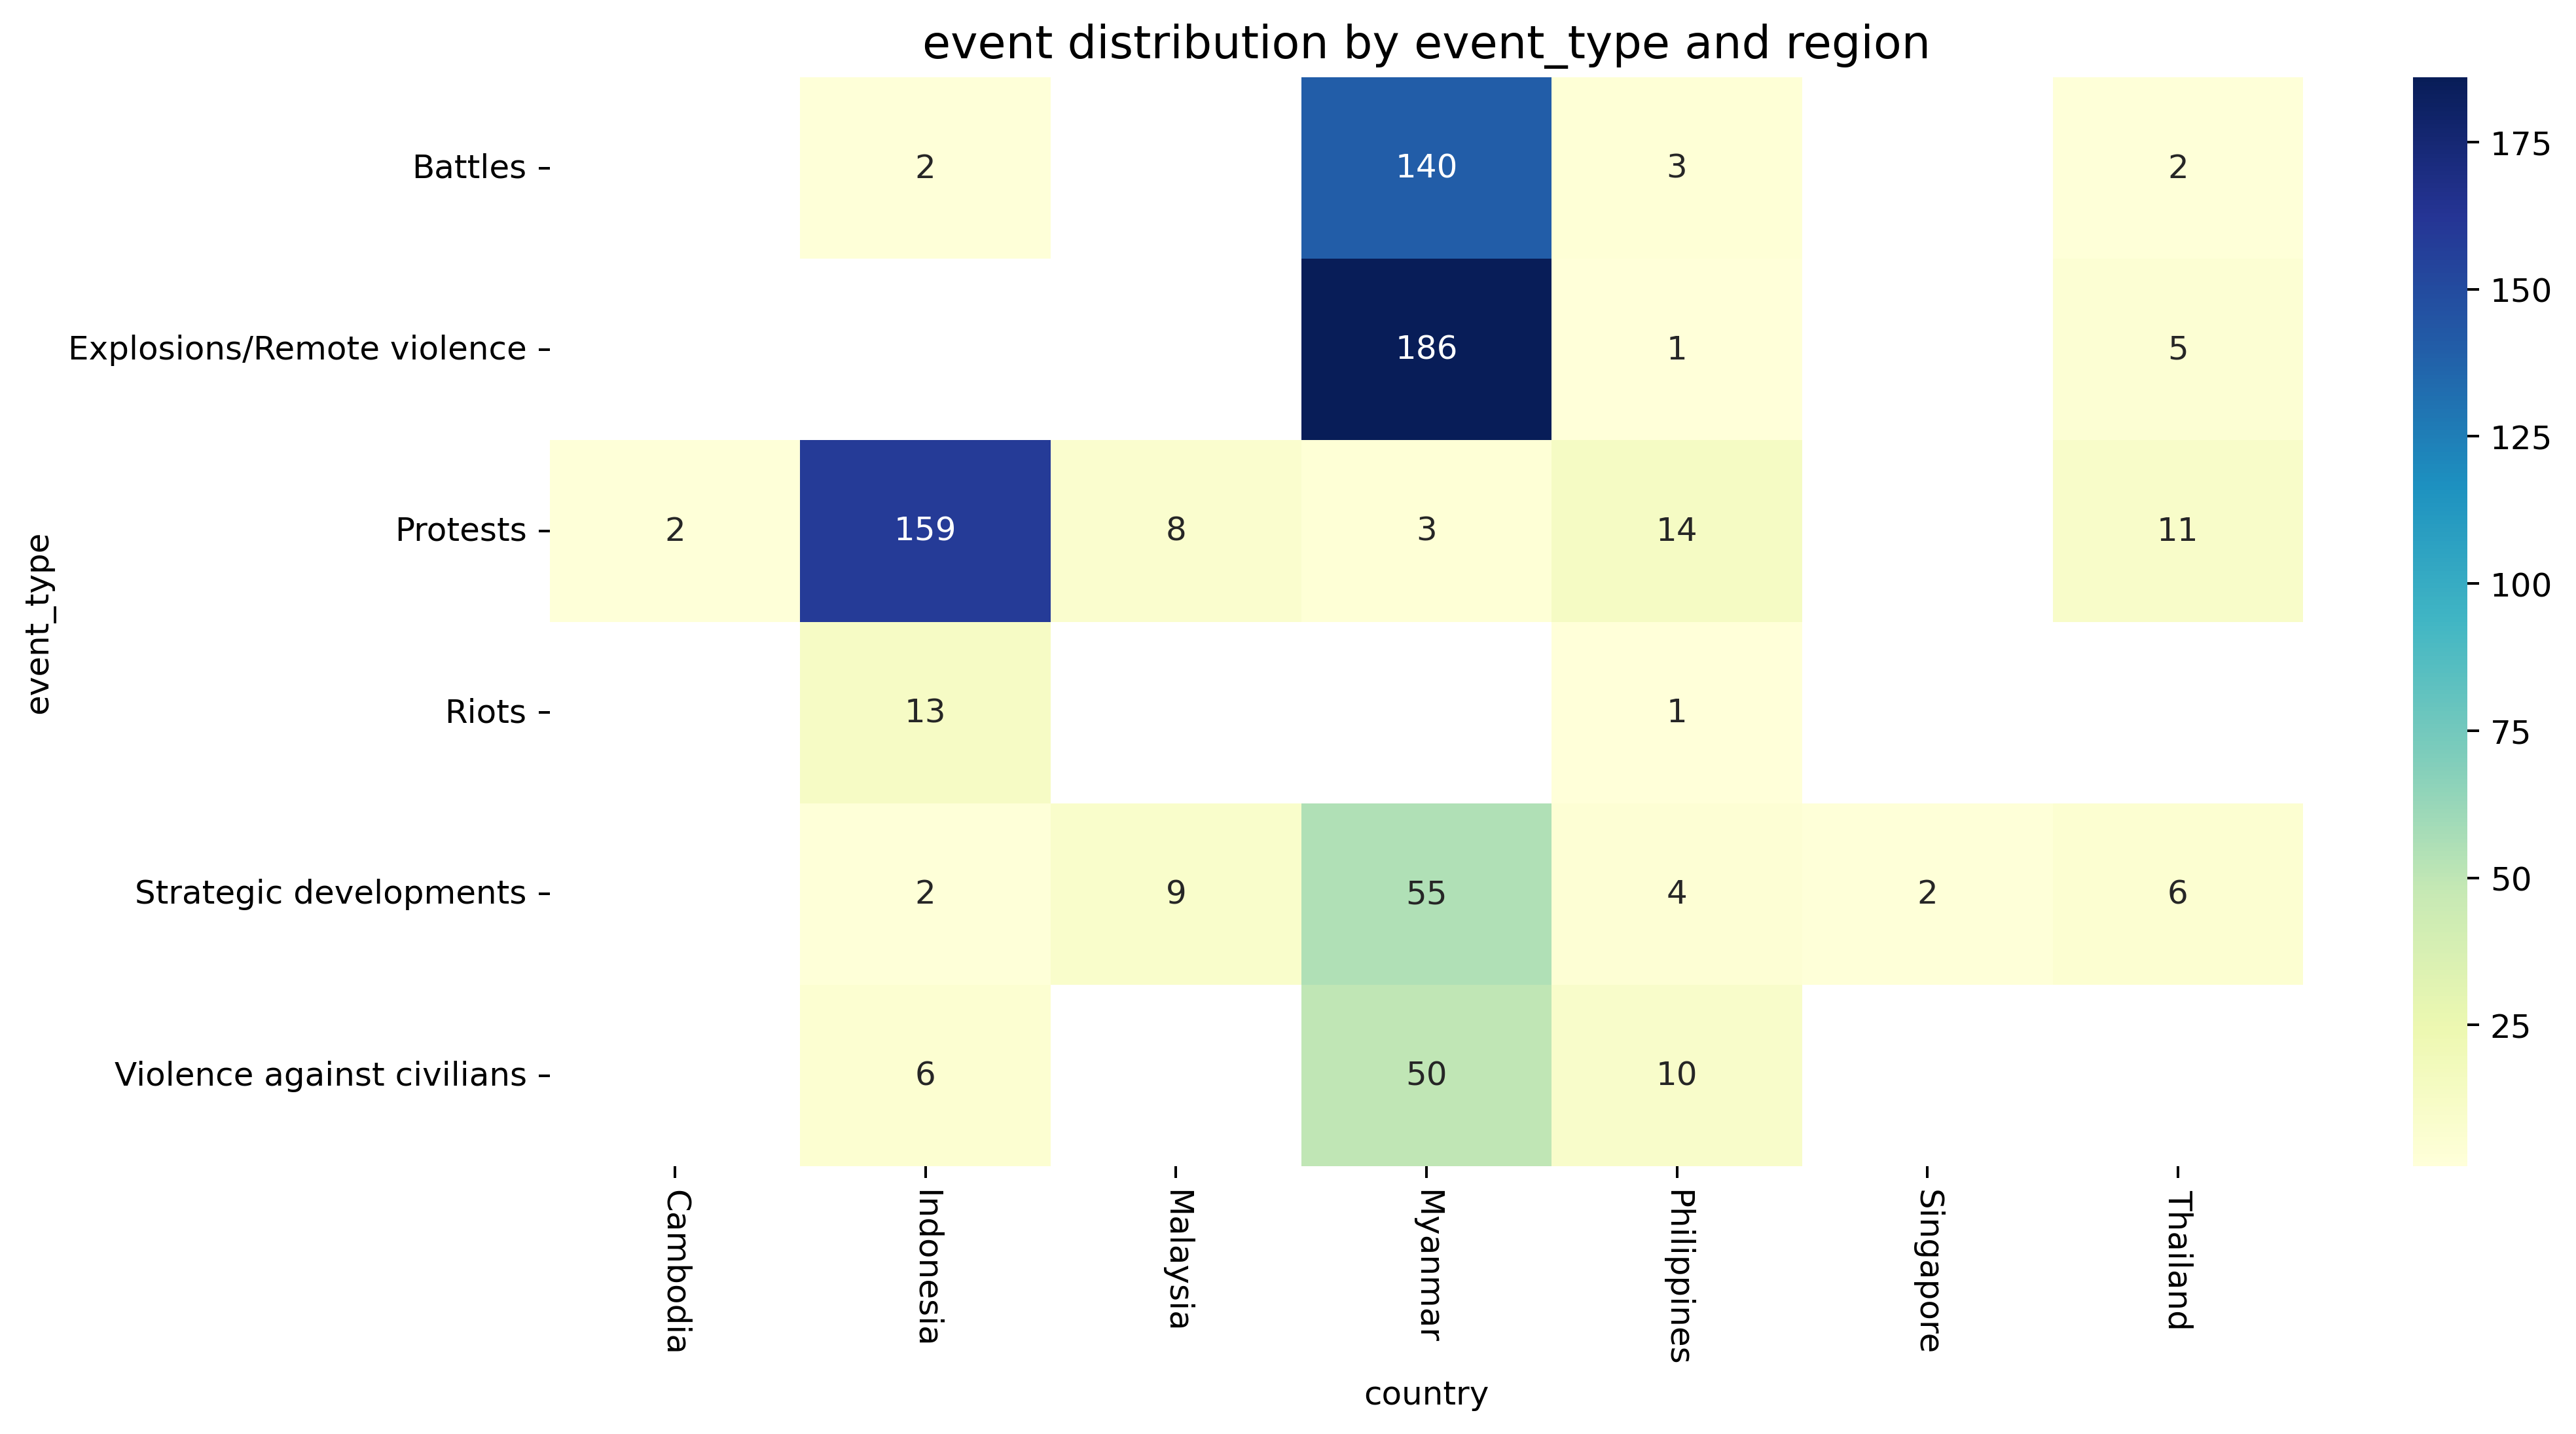

In [53]:
plt.figure(figsize=(12,6))

region_event_count2=df_filter.pivot_table(index="event_type",
                 columns=["country"],
                 values="notes",
                 aggfunc="count",
                 margins=False)

_=sns.heatmap(region_event_count2, 
            cmap="YlGnBu",
            annot=True,
              fmt='.0f'
              )
_=plt.xticks(rotation=-90)
_=plt.title("event distribution by event_type and region",fontsize=14)

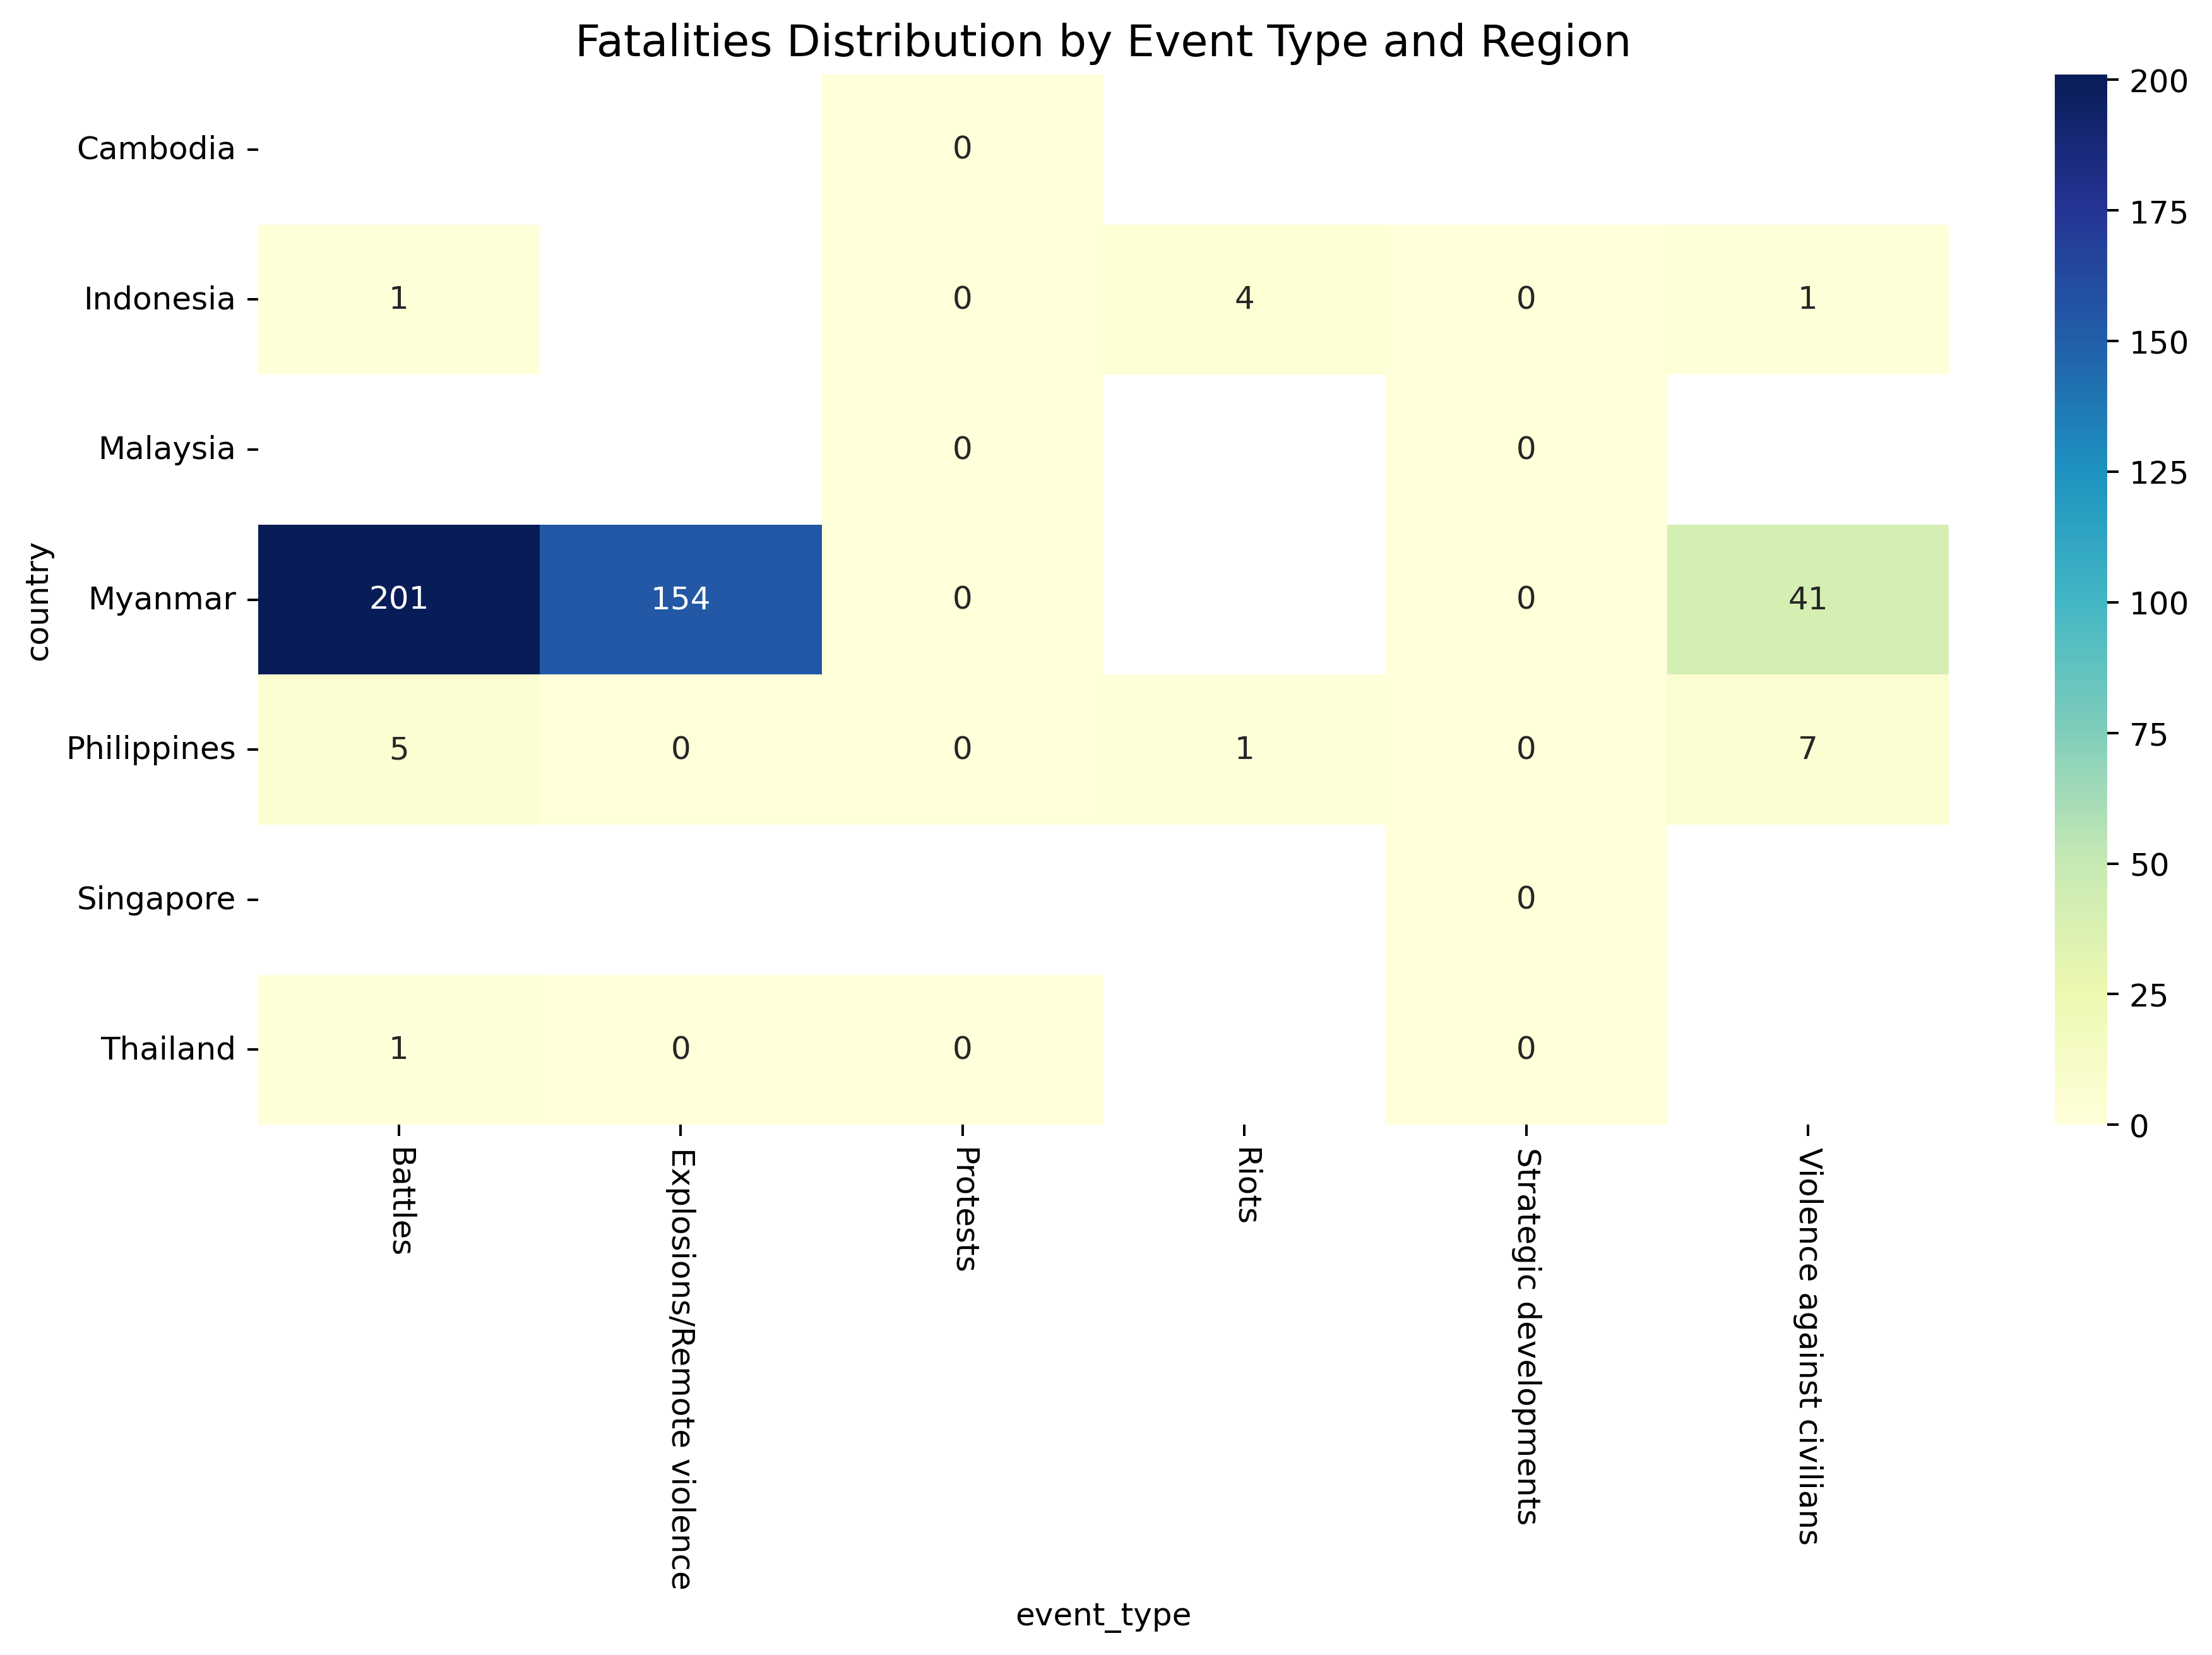

In [49]:
plt.figure(figsize=(12, 6))

# Pivot table to calculate fatalities by country and event type
region_fatality_count2 = df_filter.pivot_table(
    index="country",
    columns="event_type",
    values="fatalities",
    aggfunc="sum",
    margins=False
)

# Create the heatmap
sns.heatmap(
    region_fatality_count2, 
    cmap="YlGnBu",
    annot=True,
    fmt=".0f"  # Display as whole numbers
)

# Adjustments for better readability
plt.xticks(rotation=-90)
plt.title("Fatalities Distribution by Event Type and Region", fontsize=14)
plt.show()



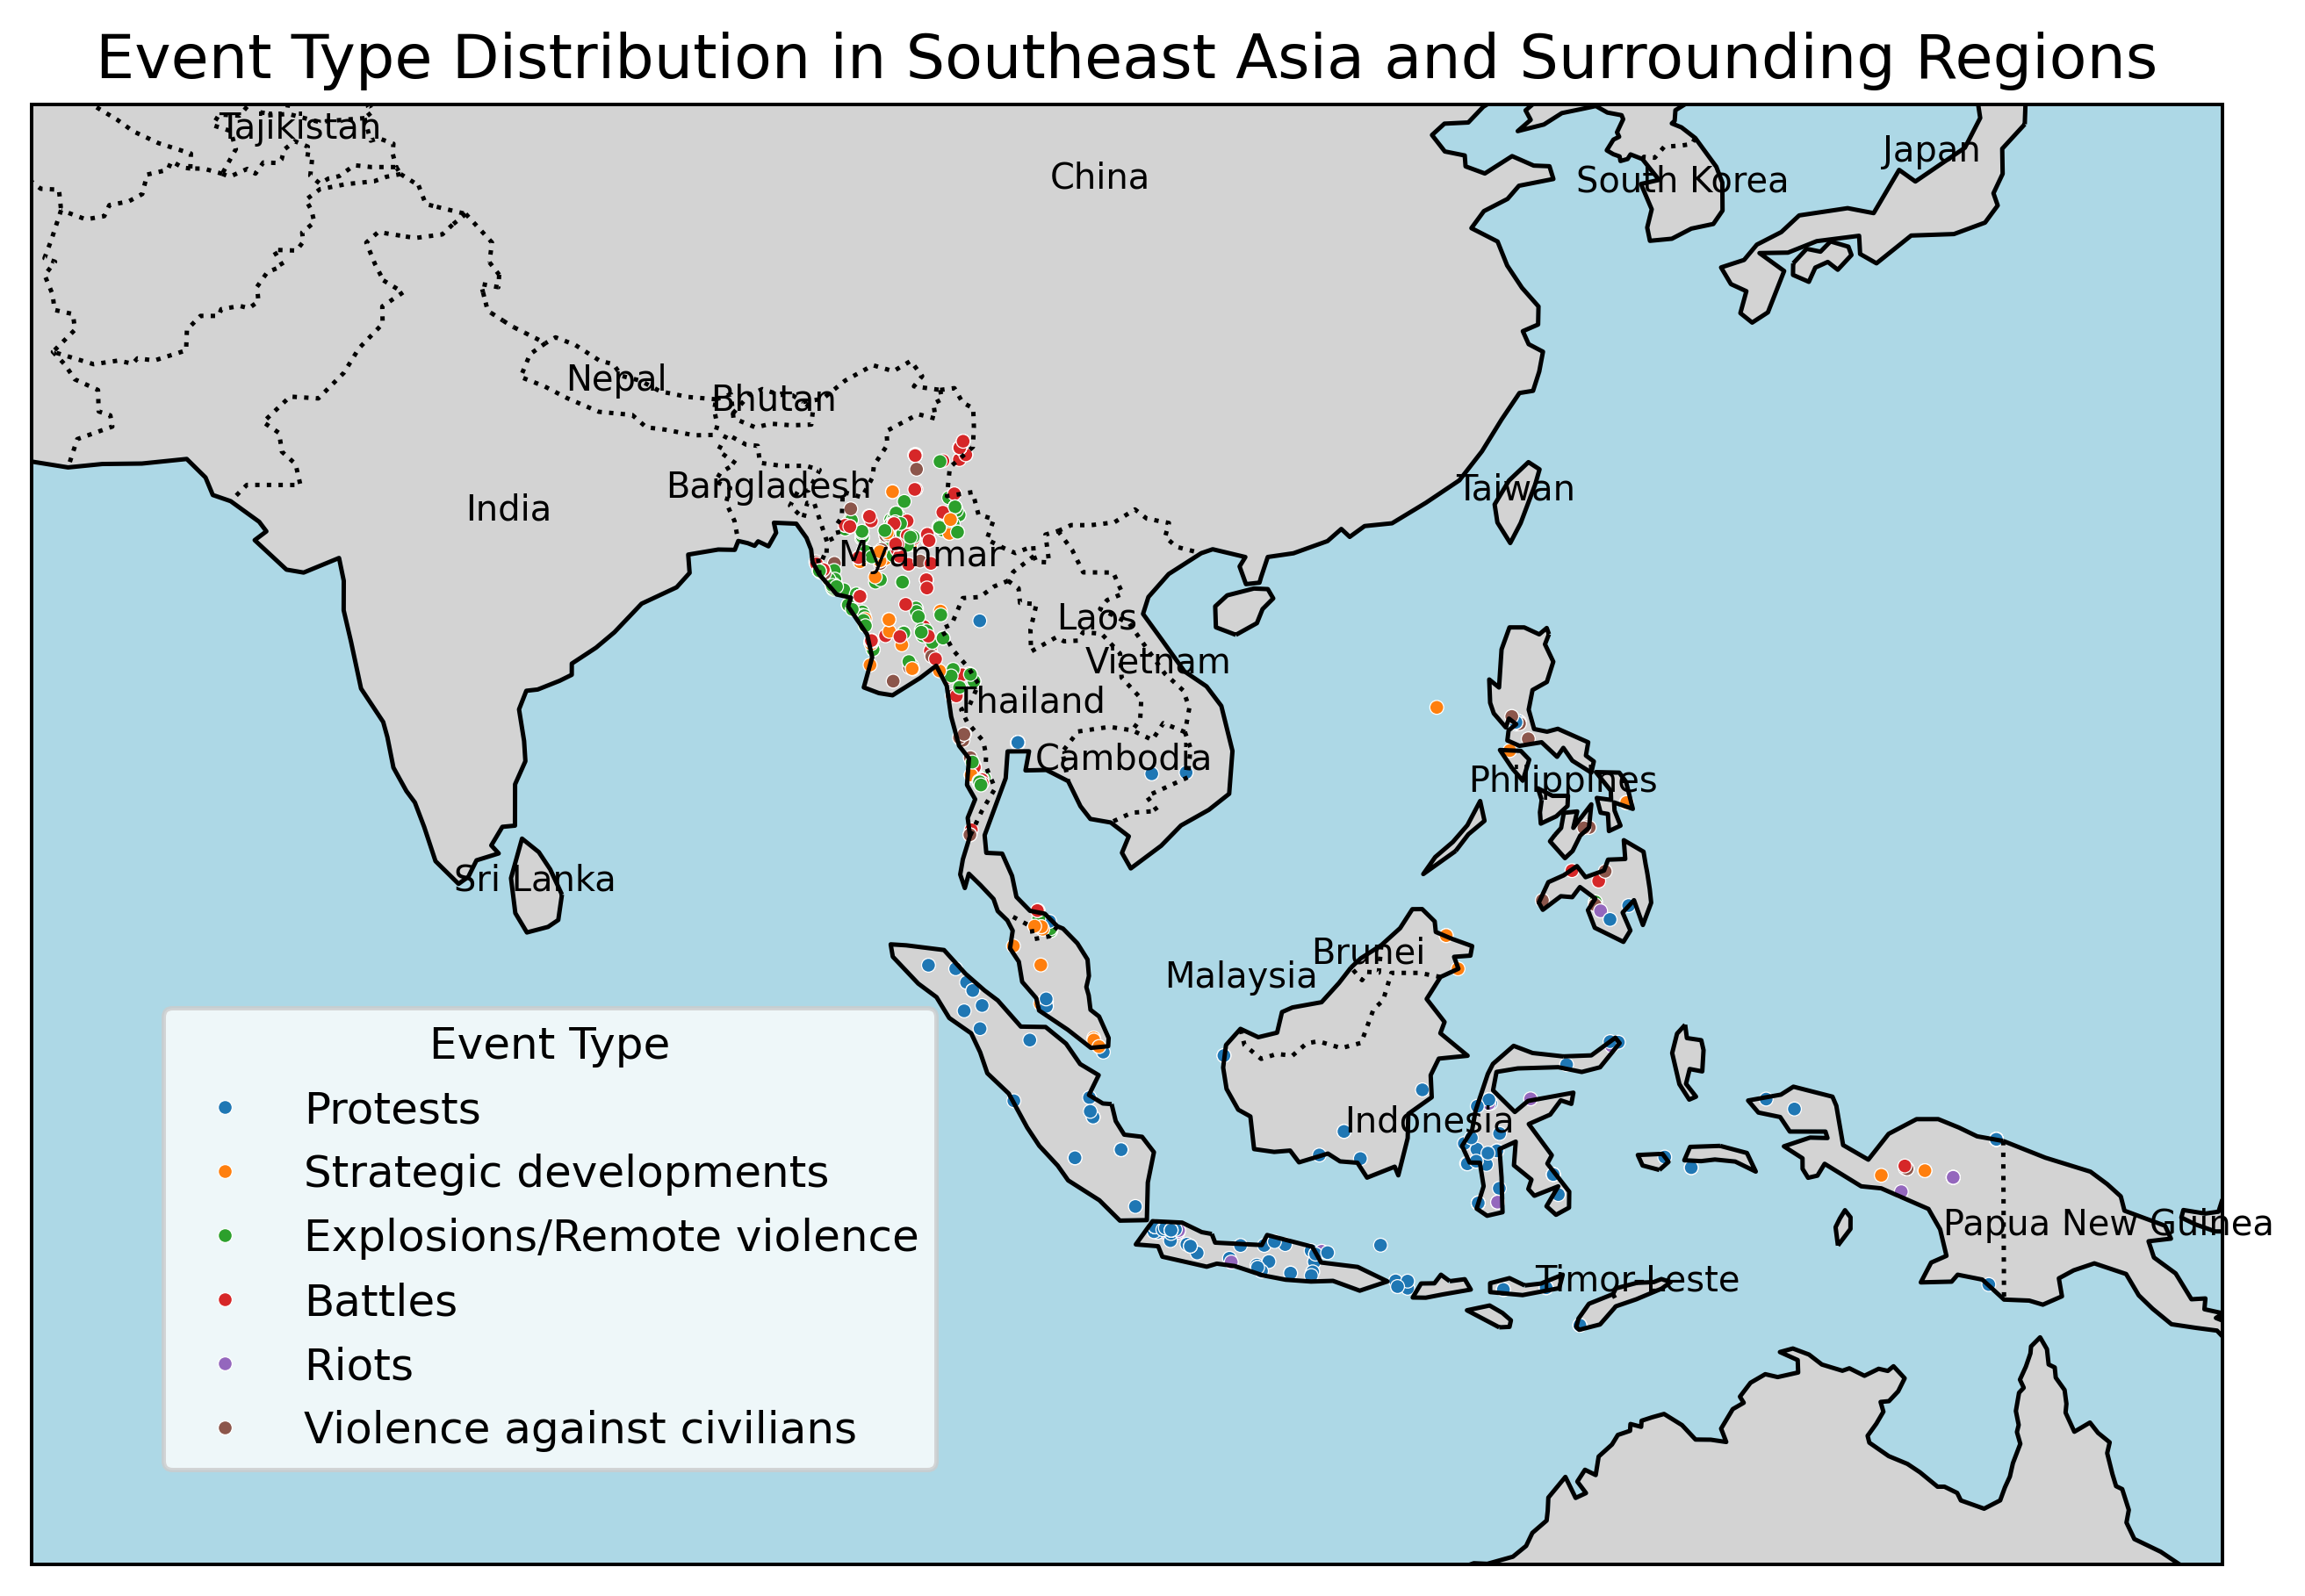

In [79]:
# Set up the plot with a Cartopy projection with a larger extent
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Define a wider extent: [min_lon, max_lon, min_lat, max_lat]
ax.set_extent([60, 150, -20, 40], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color="lightgray")
ax.add_feature(cfeature.OCEAN, color="lightblue")

# Plot the events as a scatter plot
scatter = sns.scatterplot(
    x="longitude",
    y="latitude",
    hue="event_type",
    data=df_filter,
    ax=ax,
    s=10  # Adjust point size as needed
)

# Add country names using the Natural Earth 'cultural' dataset
countries_shp = natural_earth(resolution='110m', category='cultural', name='admin_0_countries')
for country in Reader(countries_shp).records():
    # Filter for countries within the new wider extent
    if 70 < country.geometry.centroid.x < 150 and -20 < country.geometry.centroid.y < 40:
        ax.text(
            country.geometry.centroid.x, 
            country.geometry.centroid.y, 
            country.attributes['NAME'],
            fontsize=8,
            ha='center', color='black'
        )

# Move the legend to the bottom left corner with padding to avoid overlap
plt.legend(loc='lower left', title="Event Type", frameon=True, bbox_to_anchor=(0.05, 0.05))

# Set plot title
plt.title("Event Type Distribution in Southeast Asia and Surrounding Regions", fontsize=14)

# Display the plot
plt.show()